# <center>ASAM performance on cifar10 dataset<center>

In [12]:
from utils_cifar import *
import os
%load_ext autoreload
%autoreload 2

seed = 0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(torch.cuda.is_available())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
False


## 0 : Loading of cifar10 dataset

In [2]:
BATCH_SIZE = 128

trainloader, testloader, classes = load_cifar(batch_size=BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


##### Have a look at the dataset

In [3]:
# get some random training images
dataiter = iter(trainloader)
images_train, labels = dataiter.next()

# get some random testing images
dataiter = iter(trainloader)
images_test, labels = dataiter.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


256


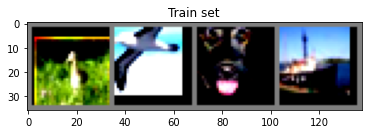

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


256


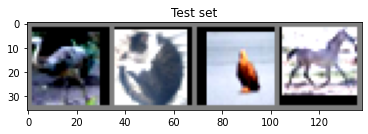

In [4]:
print(len(images_train))

# show images
plt.title('Train set')
imshow(torchvision.utils.make_grid(images_train[:4]))

print(len(images_test))

# show images
plt.title('Test set')
imshow(torchvision.utils.make_grid(images_test[:4]))

**MODIFY THIS CELL : choose your model and the number of epochs**

In [11]:
n_epochs = 1
model = 'Net'

assert model in ['Net', 'wrn28_10'], f"Invalid model. Please select 'net' or 'wrn28_10'"

## 1 : Training and testing with ADAM

In [21]:
if(model=='wrn28_10') :
    torch.manual_seed(seed)
    net = wrn28_10(num_classes=10).to(device)
else :
    torch.manual_seed(seed)
    net = Net().to(device)

#Network you want to load, if it exists
DIR_NAME = './'
FILE_NAME = 'net'
PATH = DIR_NAME + FILE_NAME + '.pth'

if(os.path.exists(PATH)) :
    #Load pre-trained weights
    print('Loading of the pre-trained network', FILE_NAME, '...')
    net.load_state_dict(torch.load(PATH))
    print('Done')
    #Testing
    print('')
    print('Testing...')
    test(testloader, model=net)
else : 
    #Train the network and save it
    print('Training...')
    train_ADAM(trainloader, testloader, model=net, epochs=n_epochs)
    print('Save the model...')
    save_model(net, 'net')
    print('Done')

Training...
[1,   100] loss: 0.102
[1,   200] loss: 0.090
[1,   300] loss: 0.084
Epoch: 1, Train accuracy:  33.58 %, Train loss:  0.01400
Epoch: 1, Test accuracy:   44.37 %, Test loss:   0.01195
Best test accuracy: 44.37
Save the model...
Done


In [22]:
#Testing for each class of cifar10
test_classes(testloader, net, classes = classes) 

Accuracy for class: plane is 49.9 %
Accuracy for class: car   is 62.3 %
Accuracy for class: bird  is 10.7 %
Accuracy for class: cat   is 24.8 %
Accuracy for class: deer  is 16.6 %
Accuracy for class: dog   is 37.0 %
Accuracy for class: frog  is 71.6 %
Accuracy for class: horse is 68.8 %
Accuracy for class: ship  is 54.6 %
Accuracy for class: truck is 47.4 %


## 2 : Training and testing with ASAM

In [23]:
if(model=='wrn28_10') :
    torch.manual_seed(seed)
    net_asam = wrn28_10(num_classes=10).to(device)
else :
    torch.manual_seed(seed)
    net_asam = Net().to(device)

#Network you want to load, if it exists
DIR_NAME = './'
FILE_NAME = 'net_asam'
PATH = DIR_NAME + FILE_NAME + '.pth'

if(os.path.exists(PATH)) :
    #Load pre-trained weights
    print('Loading of the pre-trained network', FILE_NAME, '...')
    net_asam.load_state_dict(torch.load(PATH))
    print('Done')
    #Testing
    print('')
    print('Testing...')
    test(testloader, model=net_asam)
else : 
    #Train the network and save it
    print('Training...')
    train_minimizer(trainloader, testloader, model=net_asam, minimizer=ASAM, epochs=n_epochs, rho_=0.5, smoothing_=0.1)
    print('Save the model...')
    save_model(net_asam, 'net_asam')
    print('Done')

Training...
[1,   100] loss: 0.111
[1,   200] loss: 0.105
[1,   300] loss: 0.101
Epoch: 1, Train accuracy:  23.89 %, Train loss:  0.01629
Epoch: 1, Test accuracy:   29.23 %, Test loss:   0.01566
Best test accuracy: 29.23
Save the model...
Done


In [25]:
#Testing for each class of cifar10
test_classes(testloader, model=net_asam, classes = classes) 

Accuracy for class: plane is 54.0 %
Accuracy for class: car   is 3.3 %
Accuracy for class: bird  is 2.1 %
Accuracy for class: cat   is 34.2 %
Accuracy for class: deer  is 0.0 %
Accuracy for class: dog   is 21.6 %
Accuracy for class: frog  is 76.3 %
Accuracy for class: horse is 11.4 %
Accuracy for class: ship  is 23.2 %
Accuracy for class: truck is 66.2 %


## 3 : Training and testing with SAM

In [26]:
if(model=='wrn28_10') :
    torch.manual_seed(seed)
    net_sam = wrn28_10(num_classes=10).to(device)
else :
    torch.manual_seed(seed)
    net_sam = Net().to(device)

#Network you want to load, if it exists
DIR_NAME = './'
FILE_NAME = 'net_sam'
PATH = DIR_NAME + FILE_NAME + '.pth'

if(os.path.exists(PATH)) :
    #Load pre-trained weights
    print('Loading of the pre-trained network', FILE_NAME, '...')
    net_sam.load_state_dict(torch.load(PATH))
    print('Done')
    #Testing
    print('')
    print('Testing...')
    test(testloader, model=net_sam)
else : 
    #Train the network and save it
    print('Training...')
    train_minimizer(trainloader, testloader, model=net_sam, minimizer=SAM, epochs=n_epochs, rho_=0.05, smoothing_=0.1)
    print('Save the model...')
    save_model(net_sam, 'net_sam')
    print('Done')

Training...
[1,   100] loss: 0.110
[1,   200] loss: 0.103
[1,   300] loss: 0.100
Epoch: 1, Train accuracy:  25.20 %, Train loss:  0.01601
Epoch: 1, Test accuracy:   34.63 %, Test loss:   0.01489
Best test accuracy: 34.63
Save the model...
Done


In [27]:
#Testing for each class of cifar10
test_classes(testloader, model=net_sam, classes = classes)

Accuracy for class: plane is 48.9 %
Accuracy for class: car   is 66.8 %
Accuracy for class: bird  is 4.5 %
Accuracy for class: cat   is 18.8 %
Accuracy for class: deer  is 15.0 %
Accuracy for class: dog   is 26.8 %
Accuracy for class: frog  is 67.0 %
Accuracy for class: horse is 27.9 %
Accuracy for class: ship  is 50.5 %
Accuracy for class: truck is 20.1 %
